<a href="https://colab.research.google.com/github/oguz81/MachineLearning/blob/main/isthattomcruise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import numpy as np
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import pathlib


In [3]:
import zipfile
dataset_path = "/content/isthattomcruisedataset.zip"


In [4]:
with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')

In [5]:
archive = "/content/isthattomcruisedataset"
data_dir = pathlib.Path(archive).with_suffix('')
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

350


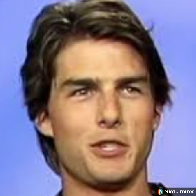

In [6]:
tomcruise = list(data_dir.glob('Tom/*'))
PIL.Image.open(str(tomcruise[0]))

In [7]:
# find out the data type of the image
#type(tomcruise[0])
img_path = "/content/isthattomcruisedataset/Tom/Tom1.png"
img = PIL.Image.open(img_path)
img_array = np.array(img)
print(img_array.dtype)


uint8


In [23]:
batch_size = 16
img_height = 196
img_width = 196

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 350 files belonging to 2 classes.
Using 280 files for training.


In [24]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 350 files belonging to 2 classes.
Using 70 files for validation.


In [10]:
class_names = train_ds.class_names
print(class_names)

['NotTom', 'Tom']


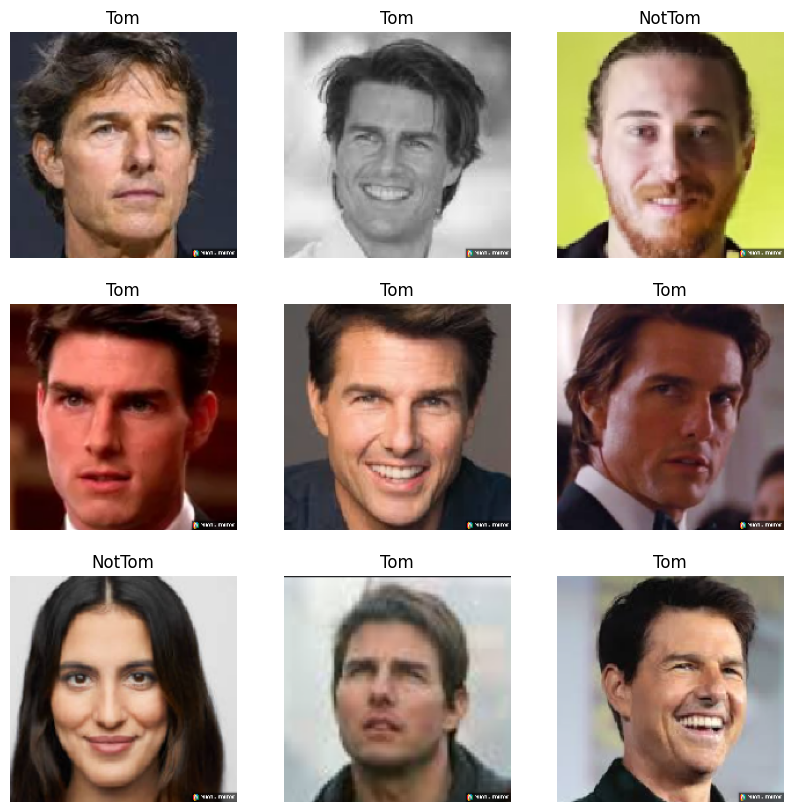

In [11]:
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 196, 196, 3)
(32,)


In [9]:
rescaling = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255)
])

In [20]:
#check the rescaling
images, labels = next(iter(train_ds))
result = rescaling(images)
print(result.shape)
print(np.min(result))
print(np.max(result))

(32, 196, 196, 3)
0.0
1.0


In [17]:
# data augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomContrast(0.5),
    tf.keras.layers.RandomBrightness(0.3),
    tf.keras.layers.Rescaling(1./255)
])

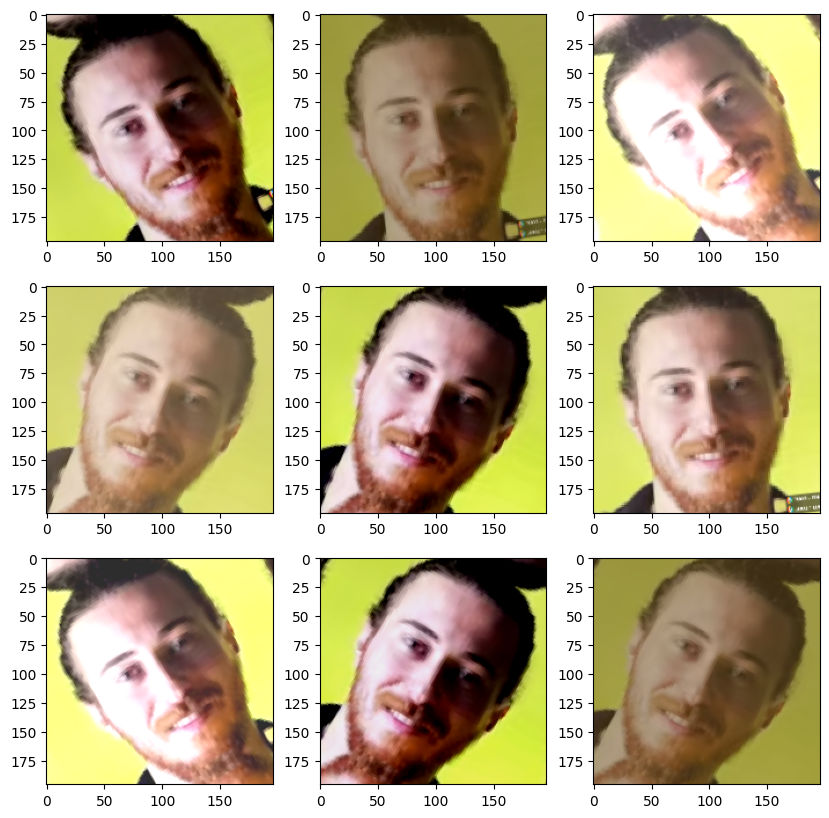

In [21]:
plt.figure(figsize=(10,10))
for i in range(9):
  augmented_images = data_augmentation(images)
  ax = plt.subplot(3, 3, i+1)
  plt.imshow(augmented_images[2])

In [31]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [32]:
num_classes = len(class_names)
model = tf.keras.Sequential([
    #data_augmentation,
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes)
])

In [33]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [34]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 15s 687ms/step - accuracy: 0.4861 - loss: 0.8305 - val_accuracy: 0.7143 - val_loss: 0.6436
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 650ms/step - accuracy: 0.6982 - loss: 0.6094 - val_accuracy: 0.7714 - val_loss: 0.5533
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 20s 650ms/step - accuracy: 0.7743 - loss: 0.4946 - val_accuracy: 0.7857 - val_loss: 0.5190
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 20s 649ms/step - accuracy: 0.8639 - loss: 0.3742 - val_accuracy: 0.7857 - val_loss: 0.4846
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 21s 706ms/step - accuracy: 0.8905 - loss: 0.2667 - val_accuracy: 0.7429 - val_loss: 0.6762
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 20s 653ms/step - accuracy: 0.8406 - loss: 0.2937 - val_accuracy: 0.7714 - val_loss: 0.3987
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 20s 651ms/step - accuracy: 0.9221 - loss: 0.1860 - val_accuracy: 0.8143 - val_loss: 0.4803
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 20s 614ms/step - accuracy: 0.9832 - loss: 0.0766 - val_accu

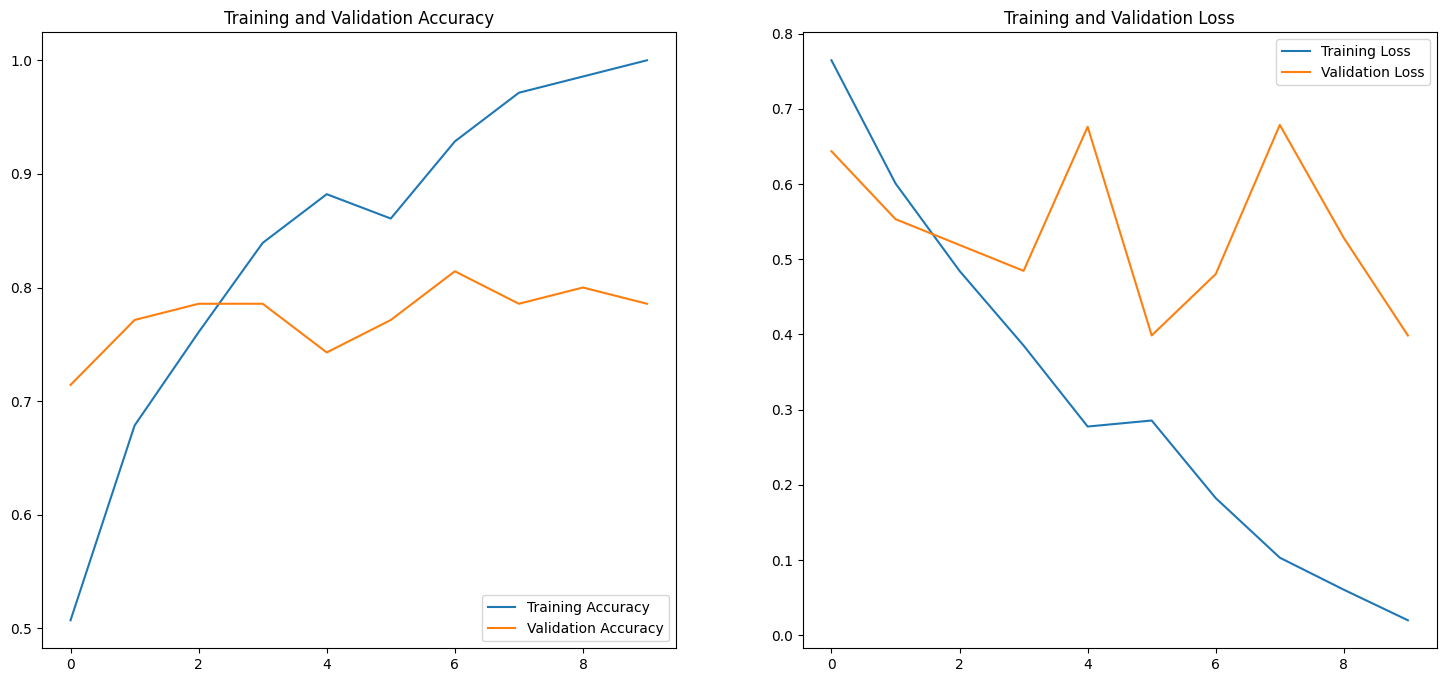

In [35]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = 10

plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
image = "/content/test3.png"

In [ ]:
from tensorflow.keras.preprocessing import image
mytestimage = "/content/test3.png"
img =  image.load_img(mytestimage, target_size=(img_height, img_width))
img_array = image.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0)
img_array = img_array / 255.0
predictions = model.predict(img_array)
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
[[-0.02087918  0.04753372]]


In [ ]:
predicted_class = np.argmax(predictions, axis=-1)
print(predicted_class)

[1]


In [18]:
test_images_path = "/content/newtestimages.zip"
with zipfile.ZipFile(test_images_path, 'r') as zipped:
    zipped.extractall('/content/')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


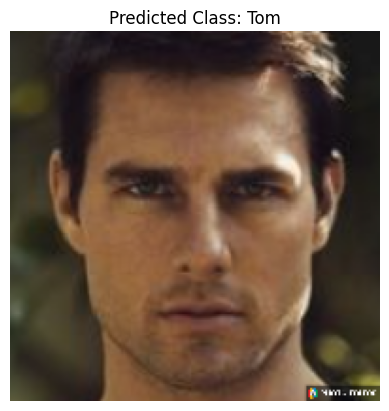

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


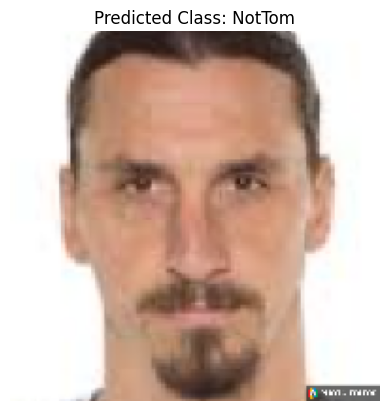

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


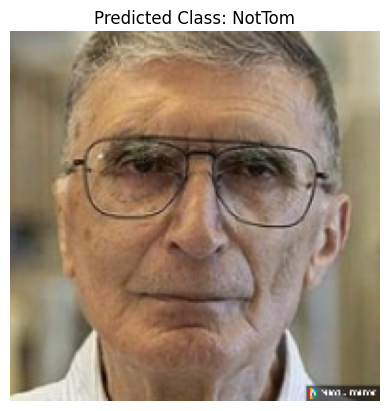

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


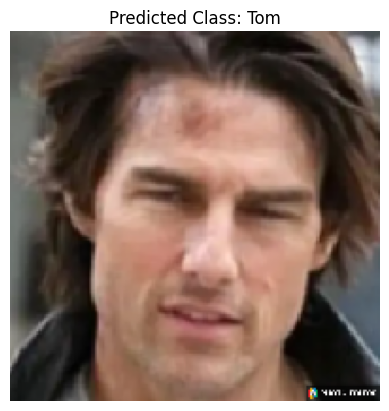

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


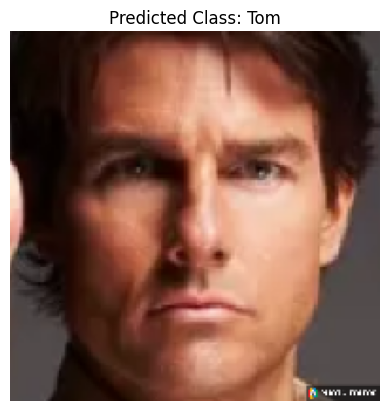

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


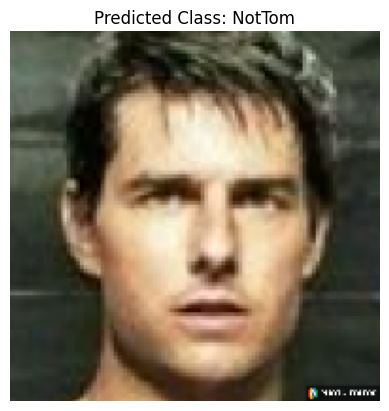

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


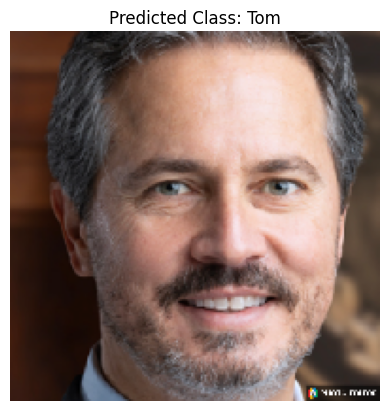

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


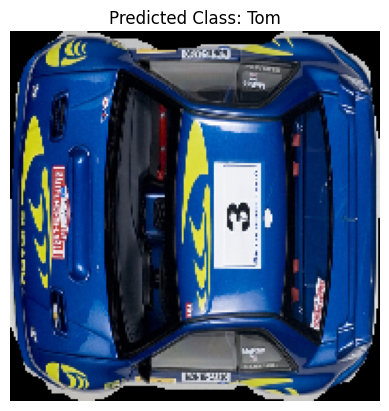

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


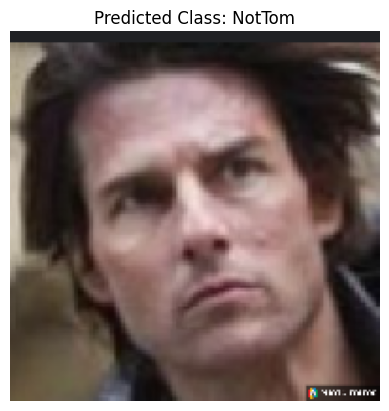

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


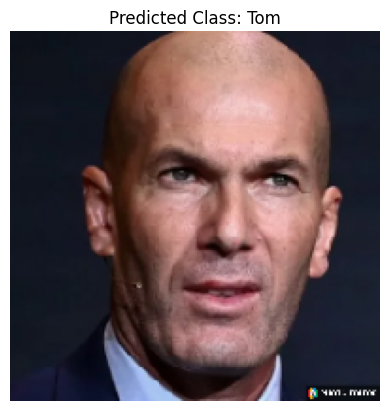

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


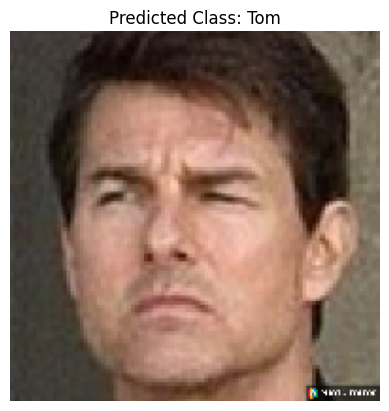

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


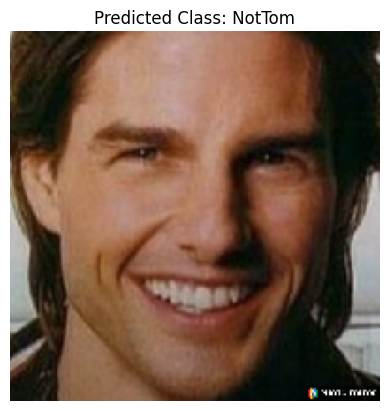

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


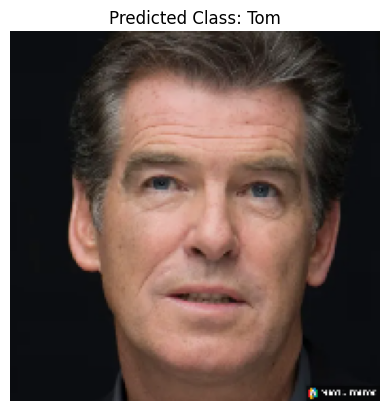

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


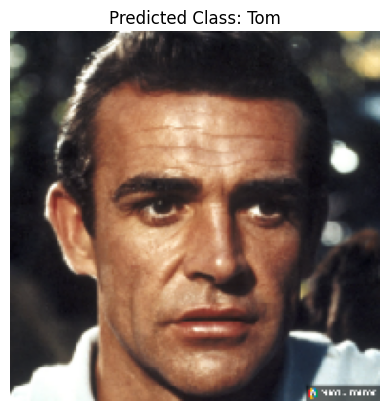

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


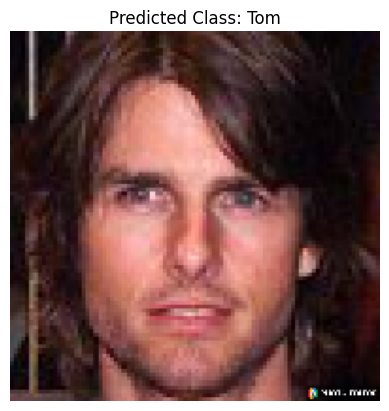

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


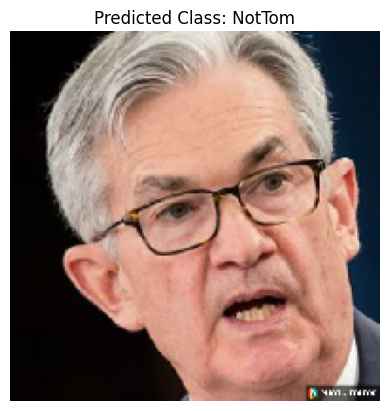

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


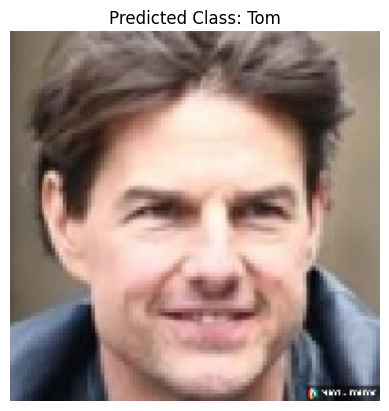

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


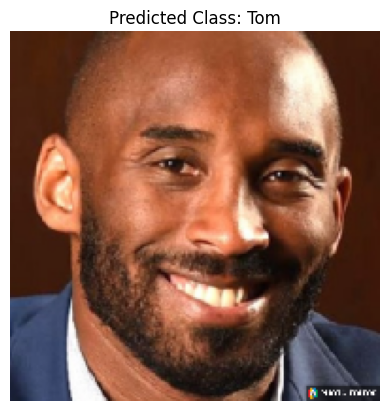

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


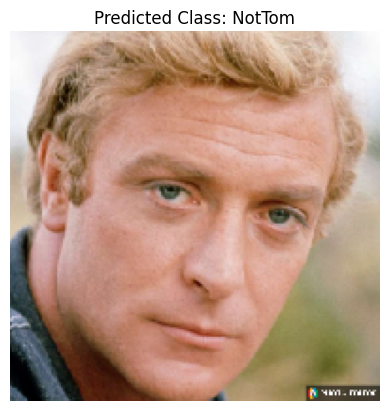

In [36]:
from tensorflow.keras.preprocessing import image
newtestimages = "/content/newtestimages"
image_files = os.listdir(newtestimages)
for image_file in image_files:
    image_path = os.path.join(newtestimages, image_file)
    img = image.load_img(image_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=-1)
    plt.imshow(img)
    plt.title(f"Predicted Class: {class_names[predicted_class[0]]}")
    plt.axis("off")
    plt.show()

In [20]:
model.save('isthattomcruise_model.keras')